<a href="https://colab.research.google.com/github/cesardka/DeepPranta/blob/master/An%C3%A1lise_de_Pl%C3%A2ntulas_Cesar_H_e_Guilherme_G_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinando uma rede pública de classificação de plântulas

por [Cesar Hoffmann](https://github.com/cesardka/) e [Guilherme Gazzo](https://github.com/ggazzo/)

orientado por [Prof. Gabriel de Oliveira Ramos](mailto:felipe_zei@hotmail.com) e [Felipe Zeiser](mailto:felipe_zei@hotmail.com)

## Introdução

Um grande problema para a área de pesquisa relacionadas à botânica, como biologia e engenharia agronômica, foram encontrar maneiras eficazes de identificar os diversos tipos de plântulas encontradas ao longo de terrenos, seja em áreas próprias designadas ou em expedições.

A categorização de espécies é um problema que os botanistas encaram até hoje, e exige um investimento grande - seja de pessoas, para realizar o processo de forma manual e sujeita a falhas, processo mais demorado, ou de equipamentos caros. A automatização desse processo necessita atualmente é comumente feita através de equipamentos eletrônicos caros e pouco acessíveis, por possuírem sensores de alta precisão e para capturar imagens de alta resolução para realizar a categorização.

A partir disso, com o avanço da ciência da computação, hoje é possível abordar o problema da falta de uma base de dados como referência para identificar e usar maneiras mais práticas para categorizar um grande volume de imagens de plântulas de maneira eficiente e usando imagens a partir de qualquer dispositivo que registre imagens digitais para criar uma rede neural capaz de identificar qual planta está presente em uma imagem, dentre as que esse rede foi treinada a categorizar.

Usando uma base de dados disponibilizada publicamente pelos pesquisadores por trás do artigo [A Public Image Database for Benchmark of Plant SeedlingClassification Algorithms](https://arxiv.org/pdf/1711.05458.pdf), foi criada um algoritmo para realizar a categorização de aproximadamente 960 plantas que pertencem a 12 espécies distintas, em diferentes etapas de seu crescimento, com o intuito de criar uma rede capaz de classificar com um alto grau de precisão qual a plântula está presente em uma determinada, ou uma série de imagens fornecidas para categorização.

## O problema

Um problema frequente ao se trabalhar com dados é lidar com a consistência com que as informações são disponibilizadas. Especialmente quando se trata de imagens, esses dados podem vir de diferentes tipos de dispositivos, do mais simples com sensores menos favorecidos em ambiente com pouca luminosidade, ao mais complexo, com alta definição, riqueza de detalhes e ângulos apropriados para que a categorização seja feita. 

Além disso, muitas vezes as bases que existem não são disponibilizadas para outros pesquisadores, ficando exclusivas aos participantes do projeto ou à organização financiadora. Essa ausência de um repositório central e público, ou ao menos particular de acesso facilitado, acaba exigindo muito retrabalho entre as pesquisas e a indústria ao dar a partida da solução de algum problema.

Deve se considerar ao iniciar de uma base dados: qual o tamanho da base que será construída; quantas espécies estarão presentes; quantas amostras de cada espécie serão necessárias para se ter um volume ideal na base de dados? qual será o padrão e os equipamentos usados para capturar essas imagens?

Com isso em mente, a base de dados que foi utilizada, disponibilizada publicamente pelos autores do artigo [A Public Image Database for Benchmark of Plant Seedling Classification Algorithms](http://arxiv.org/abs/1711.05458), foi criada com o princípio de que, a partir do momento em que não se precisa mais considerar todas essas possíveis restrições para produzir, adquirir ou ter acesso a um banco de imagens categorizado de plântulas, é possível criar uma solução capaz de processar essa base e adiante esta etapa de criação de uma base e categorização dentro de uma pesquisa ou análise.

## Os dados

Os dados usados como referência para o treinamento desta rede possui primordialmente espécies muito comuns encontradas na Dinamarca, conforme citado no artigo de origem. Todas as presentes são plântulas terrestres, ou possivelmente cultivadas em recipientes.

A base de dados é composta de 4750 imagens categorizadas entre as 12 espécies:

* Black-grass (_Alopecurus myosuroides_)
* Charlock (_Sinapis arvensis_)
* Cleavers (_Galium aparine_)
* Common Chickweed (_Stellaria media_)
* Common wheat (_Triticum aestivum_)
* Fat Hen (_Chenopodium album_)
* Loose Silky-bent (_Apera spica-venti_)
* Maize (_Zea mays_)
* Scentless Mayweed (_Tripleurospermum inodorum_)
* Shepherds Purse (_Capsella bursa-pastoris_)
* Small-flowered Cranesbill (_Geranium pusillum_)
* Sugar beet (_Beta vulgaris subsp. vulgaris convar. vulgaris var. altissima_)

Sugar Beet


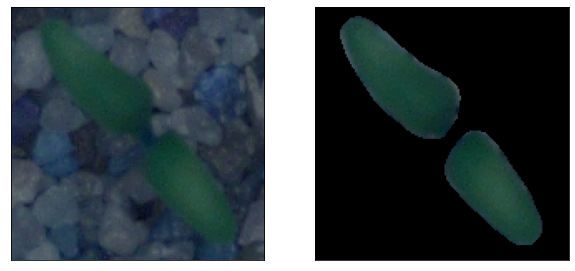

True
Sugar Beet


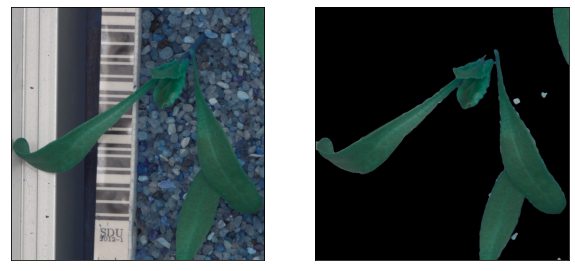

True
Sugar Beet


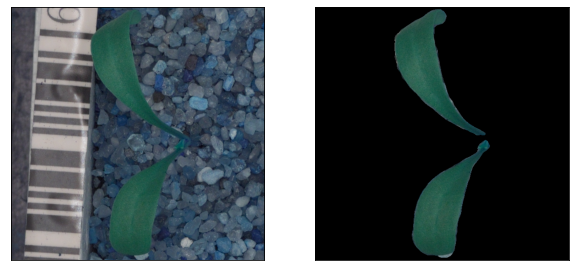

True
Sugar Beet


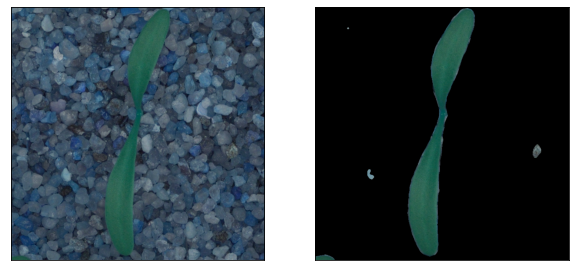

True


In [ ]:
from google.colab import files

import os
import numpy as np
import cv2
import cv2 as cv
import matplotlib.pyplot as plt

def detectGreen(src): 
    ## mask of green (36,25,25) ~ (86, 255,255)
    blurred = cv2.bilateralFilter(src,10,75,75)
    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, (22, 25, 25), (80, 255,255))
    mask = cv2.medianBlur(mask, 9)
    filtered = cv.bitwise_and(src,src,mask = mask)
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(src))

    ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
    ax.imshow(np.squeeze(filtered))

    plt.show()
    return filtered

def prepare(path, dest):
    src = cv2.imread(path, 1)
    filtered = detectGreen(src)
    # print('save', dest)
    return print(cv2.imwrite(dest, filtered))


rootdir = './data/train'
roomdest = './done/train'
for root, subdirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith('png'):
            label = root.split('/')[-1]
            dirname = os.path.join(roomdest, label)
            if not os.path.exists(dirname):
                os.makedirs(dirname)
            print(label)
            prepare(os.path.join(root, file), os.path.join(dirname, 'prepared_' + file))

## Implementando o algoritmo de análise

Foi utilizada uma rede CNN pra a análise das imagens, a estrutura utilizada foi baseda na premissa de fazer a rede mais simples possível. Para a preparação das imagens, foi optada a técnica de detecção de bordas de imagem.

Devido ao fato do escopo das imagens e a sua natureza ser conhecido previamente, foi seguida a linha de raciocínio de que o objeto observado quase em sua totalidade é verde, e o fundo da imagem composto de pedras, terra e outros minerais, conteúdo não-verde. Com isso, foi possível concluir que criando um filtro destacando somente a área verde da imagem, seria possível conseguir segmentar somente o dado relevante para a categorização ser feita, removendo todas as outras informações desnecessárias capturadas na imagem. 

In [ ]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

import keras
from keras.models import load_model
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization,SeparableConv2D
from keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers

optimizer = keras.optimizers.Adam(1e-3)
dataFolder = './done/train'
epochs = 50
h, w = 64, 64
image_size = (w, h)
batch_size = 32
validation_split=0.2
seed = 1337

if K.image_data_format() == 'channels_first':
    input_shape = (3, w, h)
else:
    input_shape = (w, h, 3)

def make_model():
    
    model = Sequential()
    model.add(keras.Input(shape=input_shape))
    model.add(layers.experimental.preprocessing.Rescaling(1./255))

    model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

model = make_model()
model.summary()
plot_model( model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,)
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

callbacks = [
    keras.callbacks.ModelCheckpoint("2.h5",  verbose=1, save_best_only=True),
]


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_42 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_43 (Activation)   (None, 32, 32, 64)      

## Treinando com os dados

Com as 4750 amostras, foi feita a divisão de quotas para treino (20%) e para validação foram utilizadas 50 épocas para o treinamento. Foi observado que foi obtido o melhor resultado durante a época de número 30.
```
Epoch 00030: val_loss improved from inf to 0.4980, saving model to model.h5
30/30 [==============================] - 34s 1s/step - loss: 0.1011 - accuracy: 0.9609 - val_loss: 0.4980 - val_accuracy: 0.8724

```

In [ ]:
print(dataFolder)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dataFolder,
    validation_split=validation_split,
    subset="training",
    seed=seed,
    label_mode='categorical',
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dataFolder,
    validation_split=validation_split,
    subset="validation",
    label_mode='categorical',
    seed=seed,
    image_size=image_size,
    batch_size=batch_size,
)

class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

train_ds = train_ds.prefetch(buffer_size=batch_size)
val_ds = val_ds.prefetch(buffer_size=batch_size)


model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

## Avaliando os resultados

Após o treino, a rede foi testada contra uma lista de imagens de plantas não categorizadas. Ao final da execução, se espera uma pasta ./test/ contendo as categorias e as imagens separadas em sub-pastas para cada uma das espécies.

A pasta de teste não está categorizada e não possúi modo automático para validar, dessa forma tivemos que validar manualmente a classificação da rede. Com a amostra testada, é possível dizer que a rede classificou praticamente todas imagens corretamente, sendo que algumas não conseguimos classificar ao olho.

Apesar de não ser a maneira ideal de validação, no futuro será incrementado uma maneira automatizada para confirmar os resultados da categorização realizada.


In [ ]:
import os
import shutil
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import sys, getopt

labels = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
# dimensions of our images
img_width, img_height = 64, 64



rootdir = './data/test/'
rootdest = './test/'

model = load_model('model.h5')
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



if os.path.exists(rootdest) and os.path.isdir(rootdest):
    shutil.rmtree(rootdest)
for root, subdirs, files in os.walk(rootdest):
    for file in files:
        original = os.path.join(root, file)
        img = image.load_img(original, target_size=(img_width, img_height))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        label = labels[model.predict_classes(images)[0]]
        print(file, label)
        dirname = os.path.join(rootdest, label)
        if not os.path.exists(dirname):
            os.makedirs(dirname)
        shutil.copyfile(original, os.path.join(dirname, file))
        


## Apêndice

Código utilizado para a aplicação categorizadora

### main.py

In [ ]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

import keras
from keras.models import load_model
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization,SeparableConv2D
from keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers

optimizer = keras.optimizers.Adam(1e-3)
dataFolder = 'data/train'
epochs = 200
h, w = 64, 64
image_size = (w, h)
batch_size = 128
validation_split=0.2
seed = 1337
if K.image_data_format() == 'channels_first':
    input_shape = (3, w, h)
else:
    input_shape = (w, h, 3)



data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dataFolder,
    validation_split=validation_split,
    subset="training",
    seed=seed,
    label_mode='categorical',
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dataFolder,
    validation_split=validation_split,
    subset="validation",
    label_mode='categorical',
    seed=seed,
    image_size=image_size,
    batch_size=batch_size,
)

class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

train_ds = train_ds.prefetch(buffer_size=batch_size)
val_ds = val_ds.prefetch(buffer_size=batch_size)


def make_model():
    
    model = Sequential()
    model.add(keras.Input(shape=input_shape))
    model.add(layers.experimental.preprocessing.Rescaling(1./255))
    # convolutional layer
    model.add(Conv2D(16, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    


    model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    

    # model.add(SeparableConv2D(1024, kernel_size=(3,3), strides=(1,1), padding='same'))
    # model.add(BatchNormalization())
    # model.add(Activation('relu'))


    

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    # model.add(Dense(64))
    # model.add(Activation('relu'))
    # model.add(Dropout(0.4))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

def make_model2():
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

model = make_model()
# model = load_model('newsave__at_30.h5')
model.summary()
plot_model( model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,)
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

callbacks = [
    keras.callbacks.ModelCheckpoint("new__save__at_{epoch}.h5",  verbose=1, save_best_only=True),
]

model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

### prepary.py

In [ ]:
import os
import numpy as np
import cv2
import cv2 as cv
from matplotlib import pyplot as plt

def detectGreen(src): 
    ## mask of green (36,25,25) ~ (86, 255,255)
    blurred = cv2.bilateralFilter(src,10,75,75)
    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, (22, 25, 25), (80, 255,255))
    mask = cv2.medianBlur(mask, 9)
    filtered = cv.bitwise_and(src,src,mask = mask)
    # plt.subplot(121),plt.imshow(src),plt.title('Original')
    # plt.xticks([]), plt.yticks([])
    # plt.subplot(122),plt.imshow(filtered),plt.title('Averaging')
    # plt.xticks([]), plt.yticks([])
    # plt.show()
    return filtered

def detectEdges(img):
    blurred_float = img.astype(np.float32) / 255.0
    edgeDetector = cv2.ximgproc.createStructuredEdgeDetection("model.yml")
    edges = edgeDetector.detectEdges(blurred_float) * 255.0
    edges = cv2.bilateralFilter(edges,10,75,75)
    return edges

def filterOutSaltPepperNoise(edgeImg):
    # Get rid of salt & pepper noise.
    count = 0
    lastMedian = edgeImg
    median = cv2.medianBlur(edgeImg, 5)
    while not np.array_equal(lastMedian, median):
        # get those pixels that gets zeroed out
        zeroed = np.invert(np.logical_and(median, edgeImg))
        edgeImg[zeroed] = 0

        count = count + 1
        if count > 70:
            break
        lastMedian = median
        median = cv2.medianBlur(edgeImg, 5)

def findSignificantContour(edgeImg):
    contours, hierarchy = cv2.findContours(
        edgeImg,
        cv2.RETR_TREE,
        cv2.CHAIN_APPROX_SIMPLE
    )
        # Find level 1 contours
    level1Meta = []
    for contourIndex, tupl in enumerate(hierarchy[0]):
        # Filter the ones without parent
        if tupl[3] == -1:
            tupl = np.insert(tupl.copy(), 0, [contourIndex])
            level1Meta.append(tupl)
# From among them, find the contours with large surface area.
    contoursWithArea = []
    for tupl in level1Meta:
        contourIndex = tupl[0]
        contour = contours[contourIndex]
        area = cv2.contourArea(contour)
        contoursWithArea.append([contour, area, contourIndex])
    contoursWithArea.sort(key=lambda meta: meta[1], reverse=True)
    largestContour = contoursWithArea[0][0]
    return largestContour

def prepare(path, dest):
    src = cv2.imread(path, 1)
    filtered = detectGreen(src)
    print('save', dest)
    return print(cv2.imwrite(dest, filtered))
    edges = detectEdges(filtered)
    edges_8u = np.asarray(edges, np.uint8)
    filterOutSaltPepperNoise(edges_8u)

    contour = findSignificantContour(edges_8u)
    # Draw the contour on the original image
    contourImg = np.copy(src)
    cv2.drawContours(contourImg, [contour], 0, (0, 255, 0), 2, cv2.LINE_AA, maxLevel=1)
    # cv2.imwrite('contour.jpg', contourImg)

    mask = np.zeros_like(edges_8u)
    cv2.fillPoly(mask, [contour], 255)

    # calculate sure foreground area by dilating the mask
    mapFg = cv2.erode(mask, np.ones((5, 5), np.uint8), iterations=10)

    # mark inital mask as "probably background"
    # and mapFg as sure foreground
    trimap = np.copy(mask)
    trimap[mask == 0] = cv2.GC_BGD
    trimap[mask == 255] = cv2.GC_PR_BGD
    trimap[mapFg == 255] = cv2.GC_FGD

    # visualize trimap
    trimap_print = np.copy(trimap)
    trimap_print[trimap_print == cv2.GC_PR_BGD] = 128
    trimap_print[trimap_print == cv2.GC_FGD] = 255
    # cv2.imwrite('trimap.png', trimap_print)


    filtered = cv.bitwise_and(src,src,mask = trimap_print)

    # plt.subplot(121),plt.imshow(src),plt.title('Original')
    # plt.xticks([]), plt.yticks([])
    # plt.subplot(122),plt.imshow(filtered),plt.title('Averaging')
    # plt.xticks([]), plt.yticks([])
    # plt.show()



    # run grabcut
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)
    rect = (0, 0, mask.shape[0] - 1, mask.shape[1] - 1)
    cv2.grabCut(src, trimap, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)

    # create mask again
    mask2 = np.where(
        (trimap == cv2.GC_FGD) | (trimap == cv2.GC_PR_FGD),
        255,
        0
    ).astype('uint8')

    contour2 = findSignificantContour(mask2)
    mask3 = np.zeros_like(mask2)
    cv2.fillPoly(mask3, [contour2], 255)


    # blended alpha cut-out
    mask3 = np.repeat(mask3[:, :, np.newaxis], 3, axis=2)
    mask4 = cv2.GaussianBlur(mask3, (3, 3), 0)
    alpha = mask4.astype(float) * 1.1  # making blend stronger
    alpha[mask3 > 0] = 255.0
    alpha[alpha > 255] = 255.0

    foreground = np.copy(src).astype(float)
    foreground[mask4 == 0] = 0
    background = np.ones_like(foreground, dtype=float) * 255.0

    # Normalize the alpha mask to keep intensity between 0 and 1
    alpha = alpha / 255.0
    # Multiply the foreground with the alpha matte
    foreground = cv2.multiply(alpha, foreground)
    # Multiply the background with ( 1 - alpha )
    background = cv2.multiply(1.0 - alpha, background)
    # Add the masked foreground and background.
    cutout = cv2.add(foreground, background)

    print('save', dest)
    print(cv2.imwrite(dest, cutout))


rootdir = './data/train/'
roomdest = './'
for root, subdirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith('png'):
            label = root.split('/')[-1]
            dirname = os.path.join(roomdest, 'done', 'train', label)
            if not os.path.exists(dirname):
                os.makedirs(dirname)
            prepare(os.path.join(root, file), os.path.join(dirname, file))

### run.py

In [ ]:
import os
import shutil
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import sys, getopt
import matplotlib.pyplot as plt

labels = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
# dimensions of our images
img_width, img_height = 64, 64



rootdir = './data/test/'
rootdest = './test/'

model = load_model('model.h5')
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


for root, subdirs, files in os.walk(rootdir):
    for file in files:
        original = os.path.join(root, file)
        img = image.load_img(original, target_size=(img_width, img_height))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        label = labels[model.predict_classes(images)[0]]
        print(file, label)
        dirname = os.path.join(rootdest, label)
        if not os.path.exists(dirname):
            os.makedirs(dirname)
        shutil.copyfile(original, os.path.join(dirname, file))
        fig = plt.figure(figsize=(10, 5))

        ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(src))
        ax.set_title("{}".format(label))
        plt.show()